# Forward Demo of Diffusion

In [134]:
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload 
%autoreload 2
from dm.util import swiss_roll_wrapper
from dm.fwd_diffusion import fwd_diffusion

## 1. Data Loading

In [86]:
n_samples = 500
sigma_n = 1
random_state = None
dim = 2

data = swiss_roll_wrapper(n_samples = n_samples, 
                       sigma_n = sigma_n,
                       random_state = random_state,
                       dim = dim)

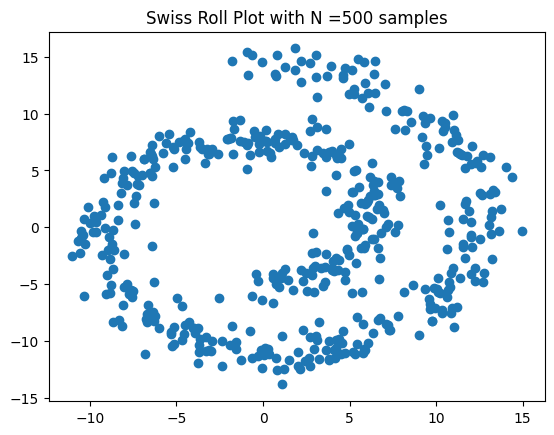

In [87]:
fig,ax = plt.subplots(1)
ax.set_title(f'Swiss Roll Plot with N ={n_samples} samples')
ax.scatter(data[:,0],data[:,1])

## 2. Forward Diffusion

In [152]:
beta_min = 0.1
beta_max = 0.2
T = 40
n_hist = 10

In [153]:
diff_hist,idx_hist = fwd_diffusion(data,beta_min,beta_max,T,n_hist)

### Diffusion Illustration

In [154]:
idx1 = 0
idx2 = 5
idx3 = 9

Text(0.5, 1.0, 't = 39')

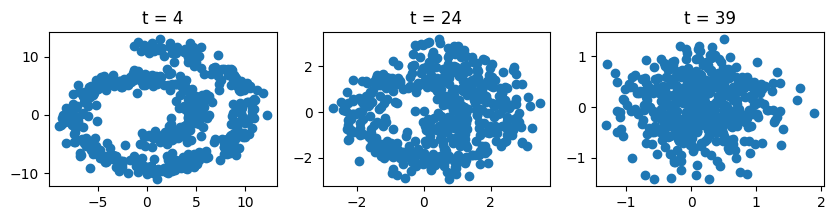

In [155]:
# Plot the three stages
fig,ax = plt.subplots(1,3,figsize=(10,2))
ax[0].scatter(diff_hist[idx1][:,0],diff_hist[idx1][:,1]) # Clean
ax[0].set_title(f't = {idx_hist[idx1]}')
ax[1].scatter(diff_hist[idx2][:,0],diff_hist[idx2][:,1]) # T//2
ax[1].set_title(f't = {idx_hist[idx2]}')
ax[2].scatter(diff_hist[idx3][:,0],diff_hist[idx3][:,1]) # T
ax[2].set_title(f't = {idx_hist[idx3]}')


### Diffusion Process Illustration
One point over multiple paths

In [299]:
n_paths = 5000
paths = []

In [300]:
beta_min = 0.02
beta_max = 0.05
T = 100
n_hist = T

In [301]:
# Path collection
for i in range(n_paths):
    diff_hist,_ = fwd_diffusion(np.array([0]).reshape((1,1)),beta_min,beta_max,T,n_hist)
    paths.append(diff_hist)

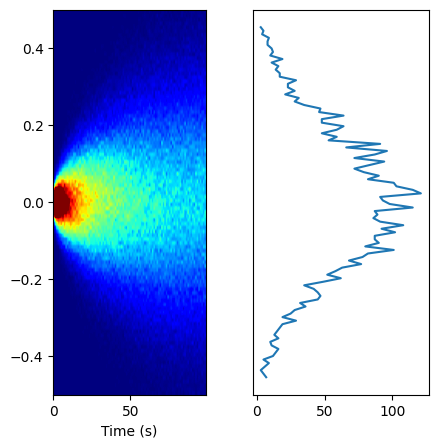

In [312]:
# Convert path list into an array of dim (n_paths,T)
paths_arr = np.array([np.array(path).flatten() for path in paths])

# Extract histogram info for each T
n_bins = 100
bin_min = -0.5
bin_max = 0.5
hist_bin = np.linspace(bin_min,bin_max,n_bins+1)

hist_timelapse_list = [np.histogram(paths_arr[:,t],hist_bin)[0] for t in range(paths_arr.shape[-1])]

# Build a histogram IMAGE (NP ARRAY)
hist_img = np.array(hist_timelapse_list).T


# Plot the image
f,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(hist_img,cmap='jet',vmin=0, vmax=300,extent=[0,T-1,bin_min,bin_max],aspect=250)
ax[0].set_xlabel('Time (s)')


# Plot the final histogram (vertically)
ax[1].plot(hist_timelapse_list[-1],hist_bin[:-1])
_ = ax[1].get_yaxis().set_ticks([])
_ = ax[1].yaxis.set_ticklabels([])
